In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('condoPr.csv')

In [134]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bedrooms  201 non-null    float64
 1   Area      201 non-null    float64
 2   Prices    201 non-null    float64
 3   bathroom  201 non-null    float64
 4   Place     201 non-null    object 
dtypes: float64(4), object(1)
memory usage: 9.4+ KB


In [135]:
df.columns = df.columns.str.strip()
df.columns

Index(['bedrooms', 'Area', 'Prices', 'bathroom', 'Place'], dtype='object')

In [136]:
X = df[["bedrooms", "Area", "bathroom"]]
y = df['Prices'].values
X

,bedrooms,Area,bathroom
0,1.0,30.0,1.0
1,1.0,30.0,1.0
2,1.0,30.0,1.0
3,1.0,30.0,1.0
4,1.0,30.0,1.0
...,...,...,...
196,3.0,46.0,3.0
197,3.0,46.0,3.0
198,3.0,47.0,3.0
199,3.0,47.0,3.0


In [137]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [138]:
Xtr = scale.fit_transform(X)


In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lrmodel = LinearRegression()
lrmodel.fit(Xtr, y)
print(lrmodel.coef_, lrmodel.intercept_)

[1554485.32750603 -419029.50591332 1564277.74125994] 1539422.3186656067


In [141]:
y_pred = lrmodel.predict(Xtr)
df1= df.copy()
df1['pred_price'] = y_pred
df1['pred_price'] = df1['pred_price'].round(2)
df1

,bedrooms,Area,Prices,bathroom,Place,pred_price
0,1.0,30.0,2290000.0,1.0,faham,1516142.90
1,1.0,30.0,1449000.0,1.0,changpuk,1516142.90
2,1.0,30.0,630000.0,1.0,tasara,1516142.90
3,1.0,30.0,2200000.0,1.0,faham,1516142.90
4,1.0,30.0,650000.0,1.0,tasara,1516142.90
...,...,...,...,...,...,...
196,3.0,46.0,6250000.0,3.0,patan,4262435.30
197,3.0,46.0,5250000.0,3.0,suthep,4262435.30
198,3.0,47.0,5200000.0,3.0,patan,4239155.88
199,3.0,47.0,6250000.0,3.0,nimman,4239155.88


In [142]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [143]:
mse = mean_squared_error(y,y_pred)
mse

638974242089.7476

In [144]:
mae = mean_absolute_error(y,y_pred)
mae

657943.4712841854

In [145]:
r2 = r2_score(y, y_pred)
r2

0.5274212368060545

In [146]:
#!pip3 install matplotlib

import matplotlib.pyplot as plt

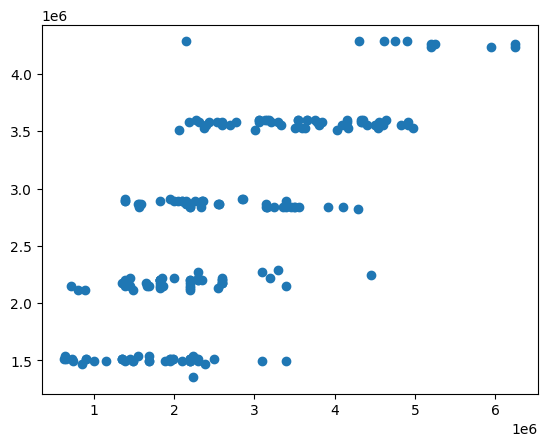

In [150]:
y_sort = sorted(y)
plt.scatter(y, y_pred)